In [149]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt

### Organizing dataframe

In [150]:
# Read in data for cse department
df_cse_rec = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Rcmnd Instr'])

# Change percent reccomend to decimal
df_cse_rec['Rcmnd Instr'] = df_cse_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Heninger, Nadia A', 'Rosing, Tajana Simunic', 'Chaudhuri, Kamalika', 'Alvarado, Christine J.', 'Minnes Kemp, Mor Mia', 'Polikarpova, Nadezhda', 'Esmaeilzadeh, Hadi', 'Riek, Laurel D', 'Gymrek, Melissa Ann', 'Chaudhuri, Kamalika', 'Nakashole, Ndapandula', 'Zaitsev, Anna L', 'Altintas De Callaf, Ilkay', 'Zhang, Yiying', 'Zhao, Jishen', 'Zhou, Yuan-Yuan']

In [151]:
# Drop null values
df_cse_rec = df_cse_rec.dropna()

# Rename columns for convenience
df_cse_rec = df_cse_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})

In [152]:
df_cse_rec.head()

,prof,rec_percent
0,"Moshiri, Alexander Niema",0.983
1,"Kane, Daniel Mertz",0.946
2,"Jones, Miles E",0.961
3,"Meyer, Kyle Phillip",0.530
4,"Meyer, Kyle Phillip",0.630


In [153]:
# Average out reccomend percent for all classes professor has taught
df_cse_rec_avg = df_cse_rec.groupby('prof', as_index=False).mean()

# Add column for gender for professor
df_cse_rec_avg['gender'] = np.where(df_cse_rec_avg['prof'].isin(women_profs), "W", "M")

df_cse_rec_avg

,prof,rec_percent,gender
0,"Aksanli, Baris",1.000000,M
1,"Allos, Haytham Issa",0.815333,M
2,"Altintas De Callaf, Ilkay",0.794484,W
3,"Alvarado, Christine J.",0.975818,W
4,"Anderson, James W.",0.600000,M
...,...,...,...
212,"Zhang, Weifeng",0.577500,M
213,"Zhang, Yiying",0.867000,W
214,"Zhao, Jishen",0.832000,W
215,"Zhou, Yuan-Yuan",0.805500,W


### Descriptive Stats

In [154]:
df_cse_rec_avg['gender'].value_counts()

M    202
W     15
Name: gender, dtype: int64

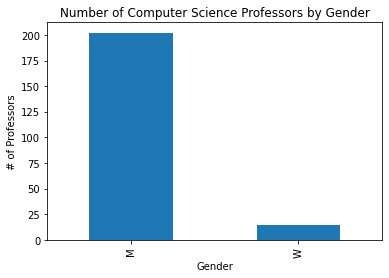

In [159]:
# Bar graphs with numbers of woman professors and men professors in CSE department
ax_cse_count = df_cse_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_cse_count.set_title('Number of Computer Science Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

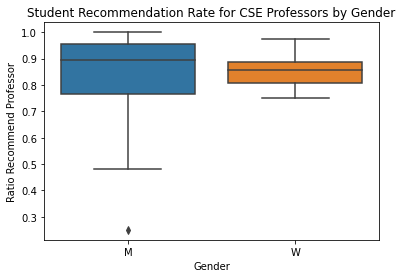

In [156]:
# Box Plots to see range of reccomendations for professors base on gender
ax_cse_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_cse_rec_avg)
ax_cse_rec_box.set_title('Student Recommendation Rate for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

### Z-test

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/

##### Defining recommended: > 75

In [28]:
#z-test
df['Gender'].value_counts()

Man      2197
Woman     205
Name: Gender, dtype: int64

In [29]:
num_women = 188
num_men = 2214

#num women recommended/total women
p1 = 163/num_women
p2 = 1741/num_men
print("P1: ", p1)
print("P2: ", p2)

P1:  0.8670212765957447
P2:  0.7863595302619693


In [30]:
#overall proportion
p = (163+1741)/(188+2214)
print("P: ", p)

P:  0.7926727726894255


In [31]:
df.loc[(df['Rcmnd Instr'] > 0.75) & (df['Gender'] == "Woman")] 

,Instructor,Rcmnd Instr,Gender
15,"Heninger, Nadia A",0.868,Woman
20,"Rosing, Tajana Simunic",0.801,Woman
25,"Chaudhuri, Kamalika",0.826,Woman
38,"Alvarado, Christine J.",1.000,Woman
39,"Minnes Kemp, Mor Mia",1.000,Woman
...,...,...,...
1949,"Zhou, Yuan-Yuan",0.818,Woman
2016,"Rosing, Tajana Simunic",0.774,Woman
2051,"Rosing, Tajana Simunic",0.810,Woman
2193,"Rosing, Tajana Simunic",0.955,Woman


In [32]:
#z-test formula
z = ((p1-p2)-0)/math.sqrt((p*(1-p))*((1/num_women)+(1/num_men)))
z

2.6192304518614566

In [33]:
# z-score associated with a 5% alpha level / 2 is 1.96.
# 2.619 > 1.96, reject the null hypothesis (so proportions are not the same)

### T-test

https://www.statisticshowto.com/probability-and-statistics/t-test/ 

https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/

### *Hypothesis Testing*

$H_o$: There is no difference between whether a man or woman professor is reccomended

$H_a$: There is a difference between whather a man or woman proffesor is reccomended

In [55]:
rp.ttest(group1= df['Rcmnd Instr'][df['Gender'] == "Woman"], group1_name= "Woman",
         group2= df['Rcmnd Instr'][df['Gender'] == "Man"], group2_name= "Man")

(   Variable       N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   205.0  0.887302  0.122300  0.008542   0.870461  0.904144
 1       Man  2197.0  0.856035  0.163350  0.003485   0.849201  0.862869
 2  combined  2402.0  0.858704  0.160475  0.003274   0.852283  0.865124,
             Independent t-test    results
 0  Difference (Woman - Man) =      0.0313
 1        Degrees of freedom =   2400.0000
 2                         t =      2.6714
 3     Two side test p value =      0.0076
 4    Difference < 0 p value =      0.9962
 5    Difference > 0 p value =      0.0038
 6                 Cohen's d =      0.1951
 7                 Hedge's g =      0.1950
 8             Glass's delta =      0.2557
 9               Pearson's r =      0.0544)